<a href="https://colab.research.google.com/github/Vib-D/PythonBootcamp/blob/main/Untitled51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/India_Covid.xlsx')
data

,Entity,Code,Day,Total confirmed deaths due to COVID-19,Population density (people per sq. km of land area),Year,Year.1,Continent
0,India,IND,2020-03-11,1,450.418617,2017,2015,Asia
1,India,IND,2020-03-12,1,450.418617,2017,2015,Asia
2,India,IND,2020-03-13,2,450.418617,2017,2015,Asia
3,India,IND,2020-03-14,2,450.418617,2017,2015,Asia
4,India,IND,2020-03-15,2,450.418617,2017,2015,Asia
...,...,...,...,...,...,...,...,...
497,India,IND,2021-07-21,418987,450.418617,2017,2015,Asia
498,India,IND,2021-07-22,419470,450.418617,2017,2015,Asia
499,India,IND,2021-07-23,419470,450.418617,2017,2015,Asia
500,India,IND,2021-07-24,420551,450.418617,2017,2015,Asia


In [ ]:
data = data.drop(['Entity','Code','Population density (people per sq. km of land area)','Year','Year.1','Continent'],axis=1)

In [ ]:
data

,Day,Total confirmed deaths due to COVID-19
0,2020-03-11,1
1,2020-03-12,1
2,2020-03-13,2
3,2020-03-14,2
4,2020-03-15,2
...,...,...
497,2021-07-21,418987
498,2021-07-22,419470
499,2021-07-23,419470
500,2021-07-24,420551


In [ ]:
data.columns = ['Dates','Confirmed Deaths']

In [ ]:
data

,Dates,Confirmed Deaths
0,2020-03-11,1
1,2020-03-12,1
2,2020-03-13,2
3,2020-03-14,2
4,2020-03-15,2
...,...,...
497,2021-07-21,418987
498,2021-07-22,419470
499,2021-07-23,419470
500,2021-07-24,420551


In [ ]:
data.isnull().values.any()

False

In [ ]:
data['Dates'] = pd.to_datetime(data['Dates'])

In [ ]:
data.head()

,Dates,Confirmed Deaths
0,2020-03-11,1
1,2020-03-12,1
2,2020-03-13,2
3,2020-03-14,2
4,2020-03-15,2


In [ ]:
data.set_index('Dates',inplace=True)

KeyError: ignored

In [ ]:
data.head()

,Confirmed Deaths
Dates,
2020-03-11,1
2020-03-12,1
2020-03-13,2
2020-03-14,2
2020-03-15,2


In [ ]:
data.describe()

,Confirmed Deaths
count,502.000000
mean,132623.938247
std,118169.085558
min,1.000000
25%,24460.250000
50%,130756.000000
75%,160116.250000
max,420967.000000


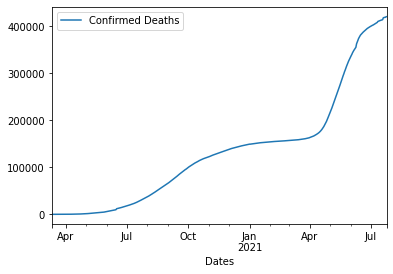

In [ ]:
data.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test_result=adfuller(data['Confirmed Deaths'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(data['Confirmed Deaths'])

ADF Test Statistic : -1.2264743223637207
p-value : 0.6621047220653858
#Lags Used : 8
Number of Observations Used : 493
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
data['Death Diff'] = data['Confirmed Deaths'] - data['Confirmed Deaths'].shift(1)

In [ ]:
data['Confirmed Deaths'].shift(1)

Dates
2020-03-11         NaN
2020-03-12         1.0
2020-03-13         1.0
2020-03-14         2.0
2020-03-15         2.0
                ...   
2021-07-21    418480.0
2021-07-22    418987.0
2021-07-23    419470.0
2021-07-24    419470.0
2021-07-25    420551.0
Name: Confirmed Deaths, Length: 502, dtype: float64

In [ ]:
data['Death Diff 2'] = data['Confirmed Deaths'] - data['Confirmed Deaths'].shift(12)

In [ ]:
data.head()

,Confirmed Deaths,Death Diff,Death Diff 2
Dates,,,
2020-03-11,1,NaN,NaN
2020-03-12,1,NaN,NaN
2020-03-13,2,NaN,NaN
2020-03-14,2,NaN,NaN
2020-03-15,2,NaN,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(data['Death Diff 2'].dropna())

ADF Test Statistic : -2.974330164540972
p-value : 0.037362177505538136
#Lags Used : 15
Number of Observations Used : 474
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


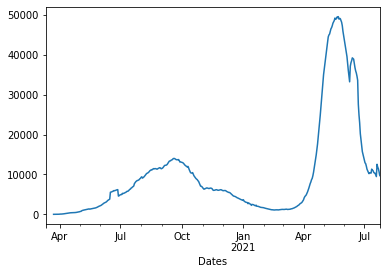

In [ ]:
data['Death Diff 2'].plot()

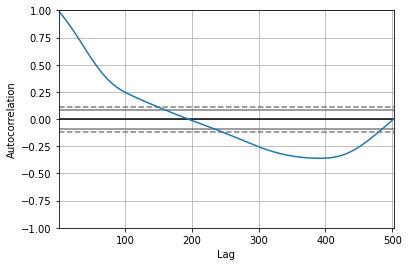

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Confirmed Deaths'])
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


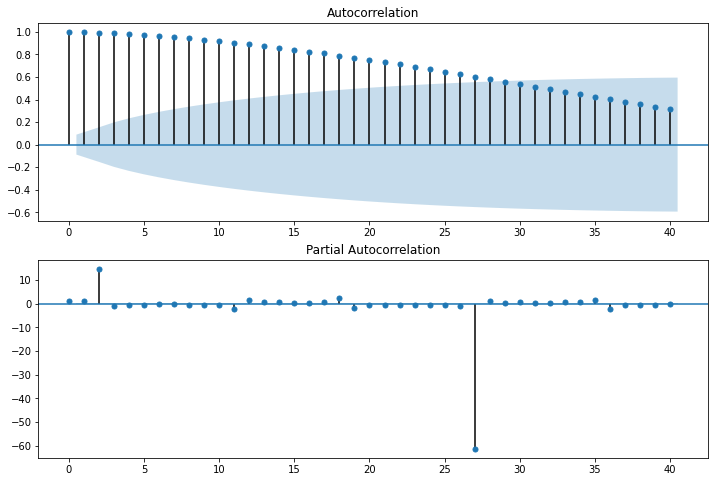

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Death Diff 2'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Death Diff 2'].iloc[13:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(data['Confirmed Deaths'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Confirmed Deaths   No. Observations:                  501
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3655.137
Method:                       css-mle   S.D. of innovations            355.756
Date:                Tue, 27 Jul 2021   AIC                           7318.275
Time:                        12:51:46   BIC                           7335.141
Sample:                    03-12-2020   HQIC                          7324.892
                         - 07-25-2021                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      708.1532    514.359      1.377      0.169    -299.973    1716.279
ar.L1.D.Confirmed Deaths     0.9891      0.006    163.889      0.000       0.977       1.001
ma.L1.D.Confirmed Deaths    -0.5898      0.036    -16.581      0.000      -0.660      -0.520
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0111           +0.0000j            1.0111            0.0000
MA.1            1.6953           +0.0000j            1.6953            0.0000
-----------------------------------------------------------------------------
"""

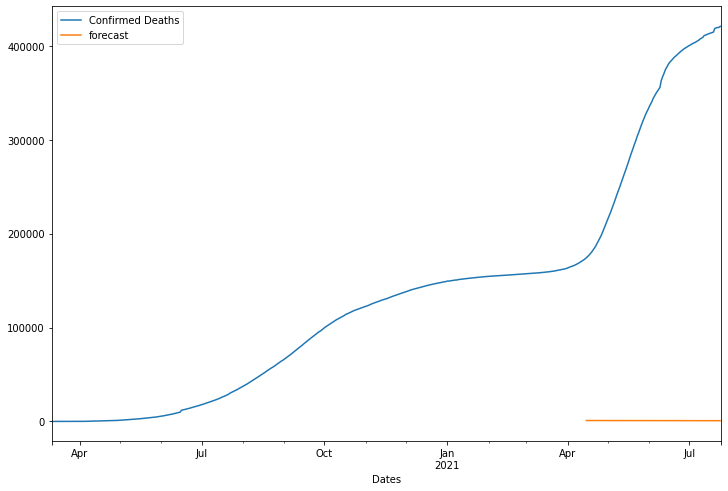

In [ ]:
data['forecast']=model_fit.predict(start=400,end=500,dynamic=True)
data[['Confirmed Deaths','forecast']].plot(figsize=(12,8))

In [ ]:
model=sm.tsa.statespace.SARIMAX(data['Confirmed Deaths'],order=(1, 1, 1),seasonal_order=(1,1,1,4))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


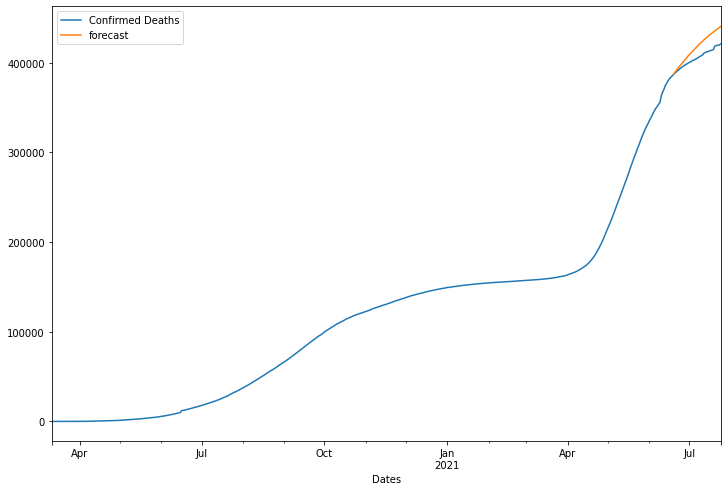

In [ ]:
data['forecast']=results.predict(start=465,end=502,dynamic=True)
data[['Confirmed Deaths','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,12)]

In [ ]:
future_datest_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [ ]:
future_datest_data.tail()

,Confirmed Deaths,Death Diff,Death Diff 2,forecast
2022-02-25,NaN,NaN,NaN,NaN
2022-03-25,NaN,NaN,NaN,NaN
2022-04-25,NaN,NaN,NaN,NaN
2022-05-25,NaN,NaN,NaN,NaN
2022-06-25,NaN,NaN,NaN,NaN


In [ ]:
future_data=pd.concat([data,future_datest_data])

In [1]:
future_data['forecast'] = results.predict(start = 500, end = 600, dynamic= True)  
future_data[['Confirmed Deaths', 'forecast']].plot(figsize=(12, 8)) 

NameError: ignored